<a href="https://colab.research.google.com/github/jayV1999/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Jayanth_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
banking_df = pd.read_csv('/content/drive/MyDrive/Data Sets/bank-full.csv',encoding = 'utf-8',delimiter = ';') 

In [ ]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
banking_df.shape

(45211, 17)

In [ ]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
banking_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
banking_df.duplicated().sum()

0

In [ ]:
banking_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
categorical_columns = banking_df.select_dtypes(include='object').columns
numerical_columns = banking_df.describe().columns
print(categorical_columns)
print(numerical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


# What Is a Term Deposit?
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

# What actually drive a client to make successful term deposit?
  1. This dataset shows that out of 45,211 clients only 11.5% clients were agreed to the direct calls marketing campaign. So that it shows that the probability of success is 11.5%.
  2. There are various factors influencing the subscription of a term deposit, but age, job, marital, loans, defaults make a major impact in availing the term deposit.
     

# **Univariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


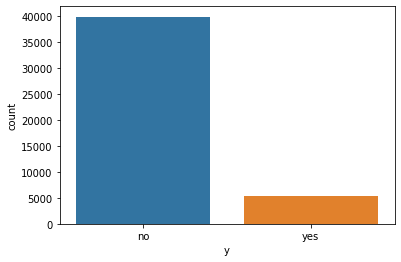

In [ ]:
sns.countplot(banking_df['y'])

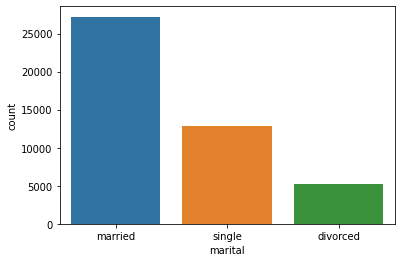

In [ ]:
sns.countplot(x=banking_df['marital'],data=banking_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


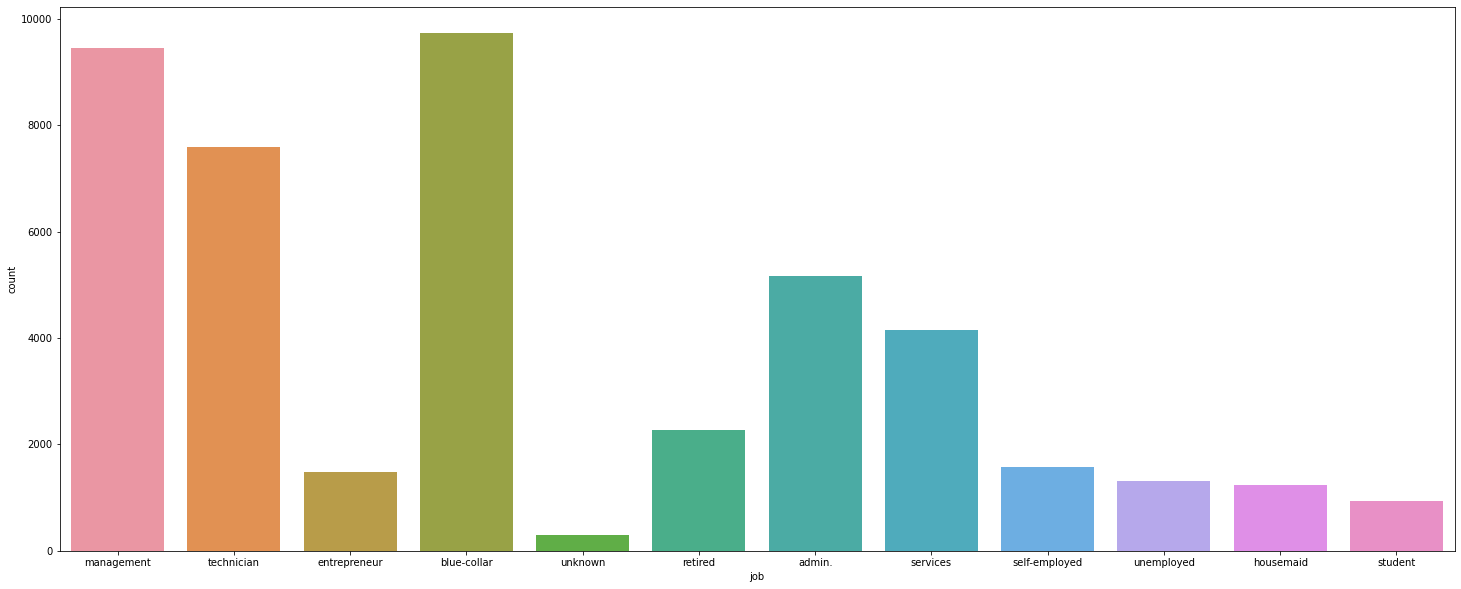

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(banking_df['job'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


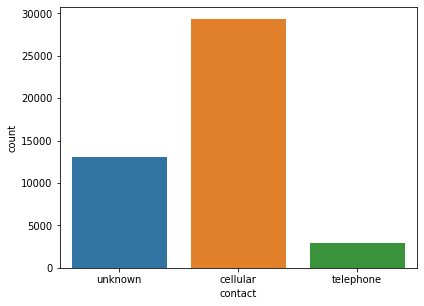

In [ ]:
plt.figure(figsize = [6.4, 4.8])
sns.countplot(banking_df['contact'])

We can infer that 

1.Clients availing term deposit mostly through cellular contact, so marketing should be focussed in cellular mode

2.Clients who are reached through telephone are the least to subscribe term deposit so we should avoid telephone marketing

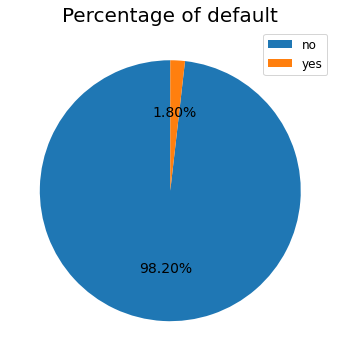

In [ ]:
plt.figure(figsize=(7,6))
label = banking_df['default'].value_counts().index.tolist()
size = banking_df['default'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of default', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})



From above pie chart 98.20 % clients have not any credit default only 1.80% of clients have default in credit.

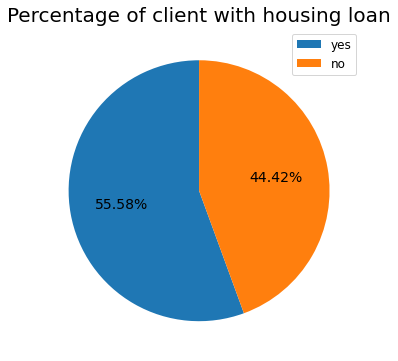

In [ ]:
plt.figure(figsize=(7,6))
label = banking_df['housing'].value_counts().index.tolist()
size = banking_df['housing'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of client with housing loan', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

55.58 % of clients having housing loan and 44.42 % clients don't have any housing loan.

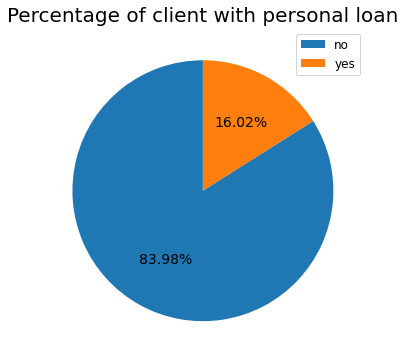

In [ ]:
plt.figure(figsize=(7,6))
label = banking_df['loan'].value_counts().index.tolist()
size = banking_df['loan'].value_counts().tolist()
plt.pie(size,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of client with personal loan', fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

83.98 % of clients having personal loan and 16.02 % clients not have any personal loan.

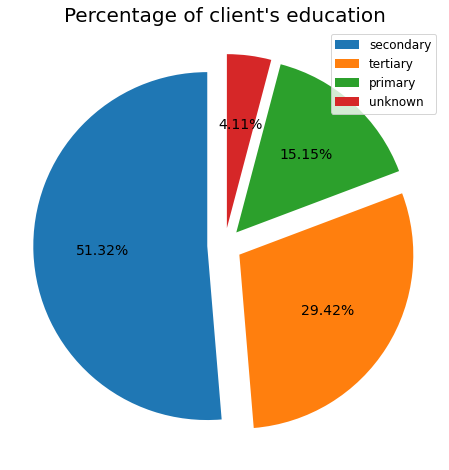

In [ ]:
plt.figure(figsize=(10,8))
label = banking_df['education'].value_counts().index.tolist()
size = banking_df['education'].value_counts().tolist()
explode = (0.1,0.1,0.1,0.1)
plt.pie(size,explode=explode,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title("Percentage of client's education", fontsize=20)
plt.legend(label,loc=1, prop = {'size' : 12})

1.51.32 % of clients are in the category of secondary education.

2.15.15% of clients are in the category of primary education.


# **Bivariate analysis**

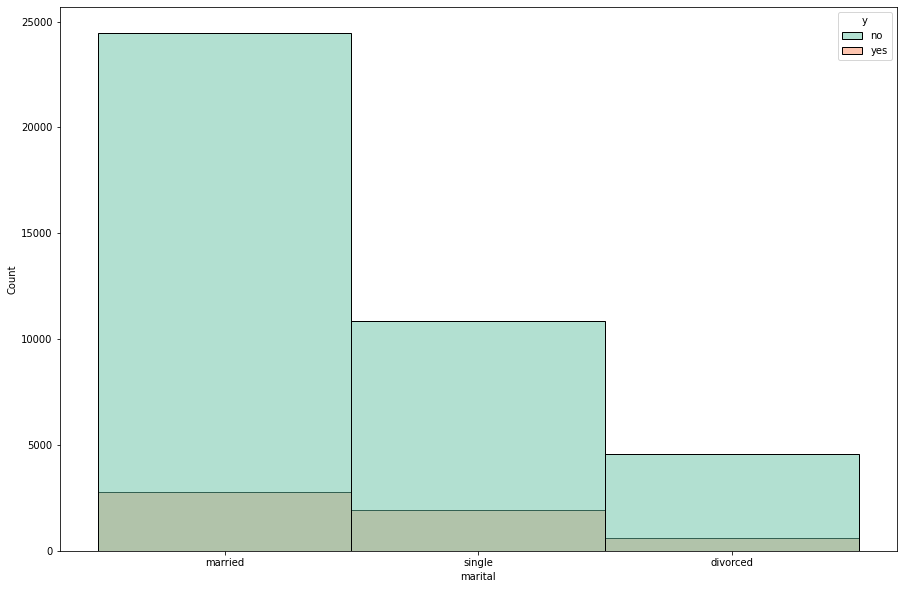

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'marital',
              data = banking_df,
              palette="Set2",hue='y')
plt.show()

It shows the subscription based on the client's marital status

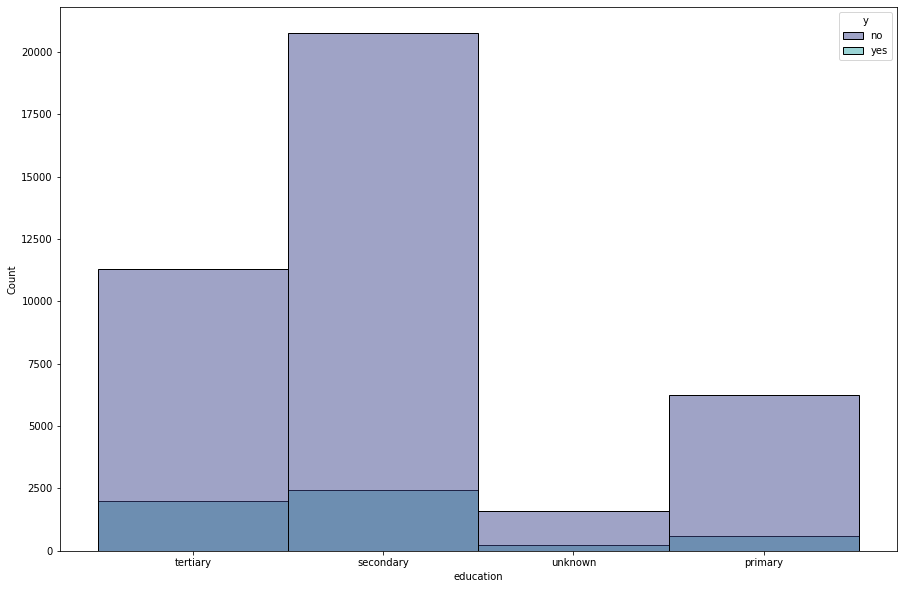

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'education',
              data = banking_df,
              palette="mako",hue='y')
plt.show()

It shows that the clients with secondary education has subscribed the term deposit most

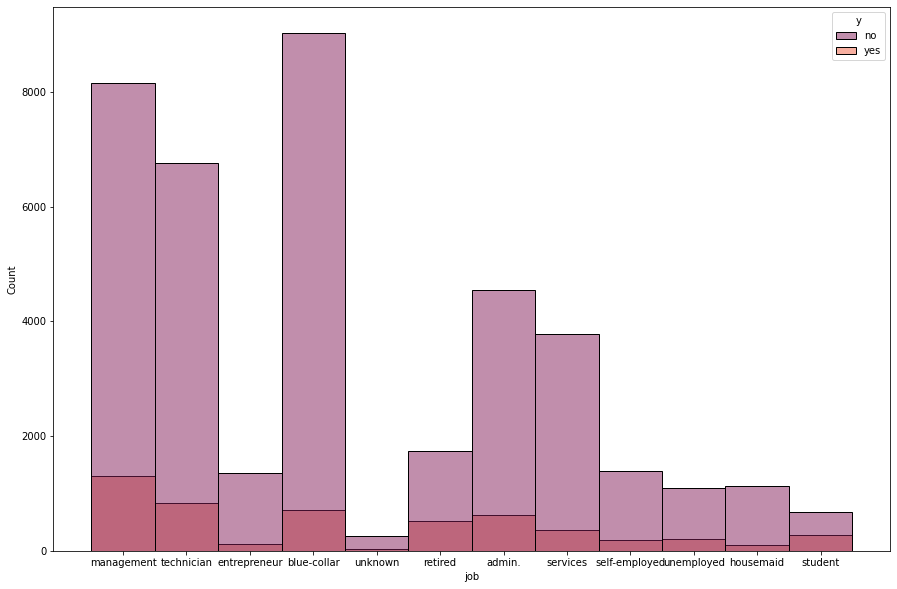

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'job',
              data = banking_df,
              palette="rocket",hue='y')
plt.show()

Through this graph we can understand that the clients with management jobs have availed term deposit most through marketing campaigns

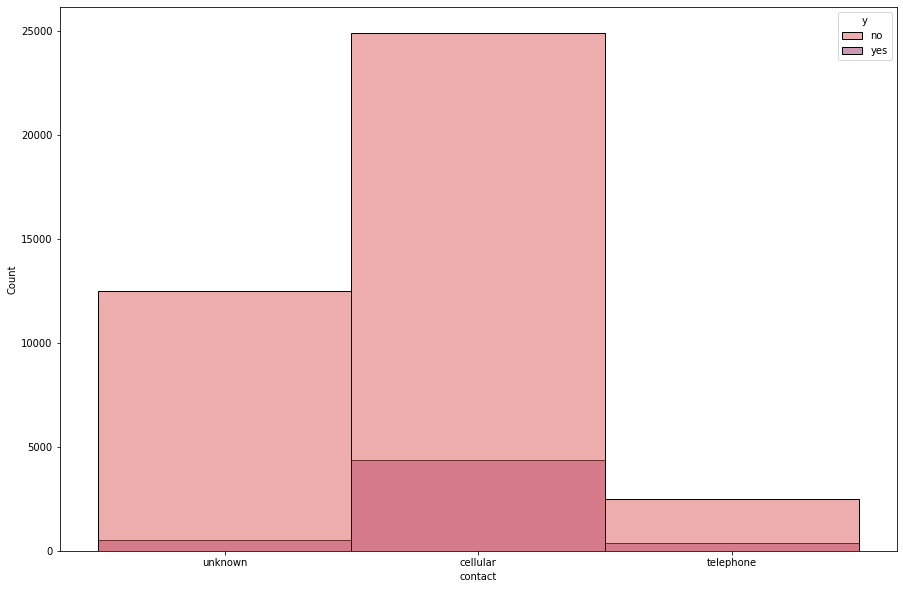

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'contact',
              data = banking_df,
              palette="flare",hue='y')
plt.show()

Marketing through cellular contact has got more subscriptions than the rest

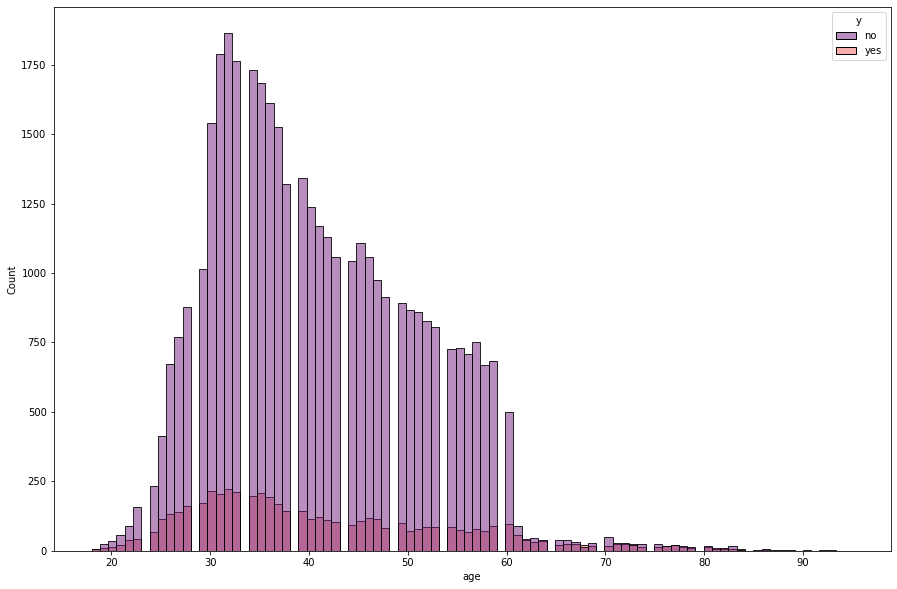

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'age',
              data = banking_df,
              palette="magma",hue='y')
plt.show()

We can conclude that from age 25 to 45 are the clients who subscribed for the term deposit

# **Outlier Treatment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


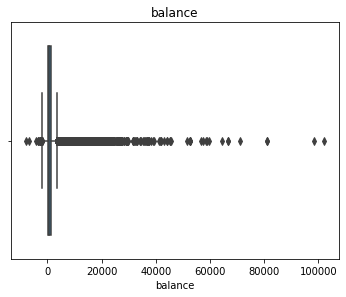

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


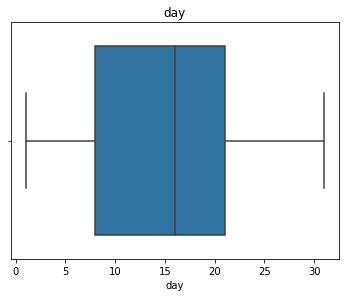

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


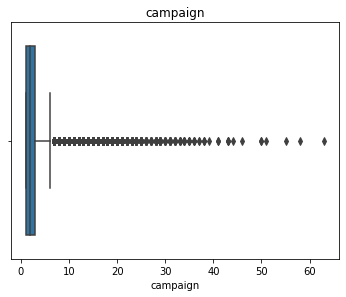

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


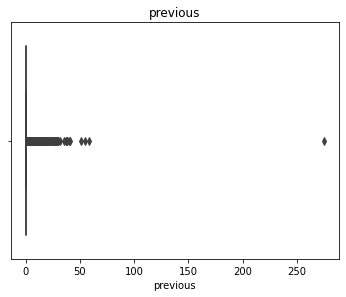

In [ ]:
col = banking_df[['balance','day','campaign','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(banking_df[i])
  plt.title(i)
  plt.show()
  n=n+1

In [ ]:
#Applying Zscore 
from scipy import stats
# z = np.abs(stats.zscore(banking_df[['balance','day','campaign','previous']]))
# print(z)
# threshold = 3
# banking_df=banking_df[(z<3).all(axis=1)]
# banking_df.shape
# code to identify them
# outliers = []
for value in banking_df[['balance','day','campaign','previous']]:
  z = np.abs(stats.zscore(banking_df[[value]]))
  banking_df=banking_df[(z<3).all(axis=1)]

banking_df.shape
#banking_df.drop(columns=['age','pdays','duration','job'],axis=1,inplace=True)

(43067, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

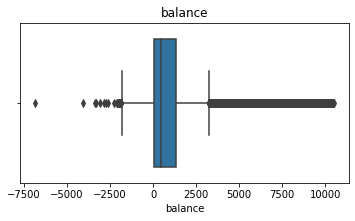

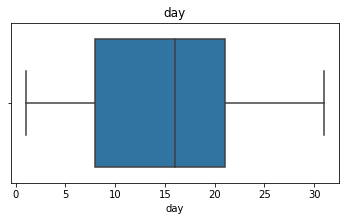

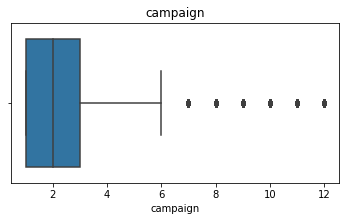

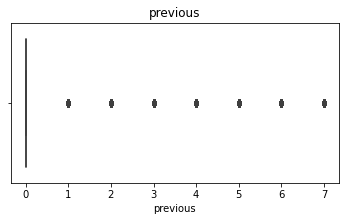

In [ ]:
#checking outliers removed ot not
for i in col:
  plt.figure(figsize=(20,10))
  plt.subplot(3,3,1)
  sns.boxplot(banking_df[i])
  plt.title(i)
plt.show()

# **Feature Engineering**

In [ ]:
for var in categorical_columns:
    print(var, ' contains ', len(banking_df[var].unique()), ' labels')

job  contains  12  labels
marital  contains  3  labels
education  contains  4  labels
default  contains  2  labels
housing  contains  2  labels
loan  contains  2  labels
contact  contains  3  labels
month  contains  12  labels
poutcome  contains  4  labels
y  contains  2  labels


In [ ]:
banking_df['job'].value_counts()

blue-collar      9358
management       8879
technician       7197
admin.           4945
services         4012
retired          2168
self-employed    1483
entrepreneur     1416
unemployed       1256
housemaid        1185
student           899
unknown           269
Name: job, dtype: int64

As job has 12 labels we will categorize them. 

cat_1 - working class clients

cat_2 - self_employed, entrepreneurship

cat_3 - retired

cat_4 - not working 

In [ ]:
def job_category(job):
  cat_1 = ['blue-collar','management','technician','admin.','services']
  cat_2 = ['self-employed','entrepreneur']
  cat_3 = ['retired']
  cat_4 = ['unemployed','housemaid','student','unknown']

  if job in cat_1:
    return 'cat_1'
  elif job in cat_2:
    return 'cat_2'
  elif job in cat_3:
    return 'cat_3'
  elif job in cat_4:
    return 'cat_4'
  return job     

In [ ]:
banking_df['job_category']=banking_df['job'].apply(job_category)

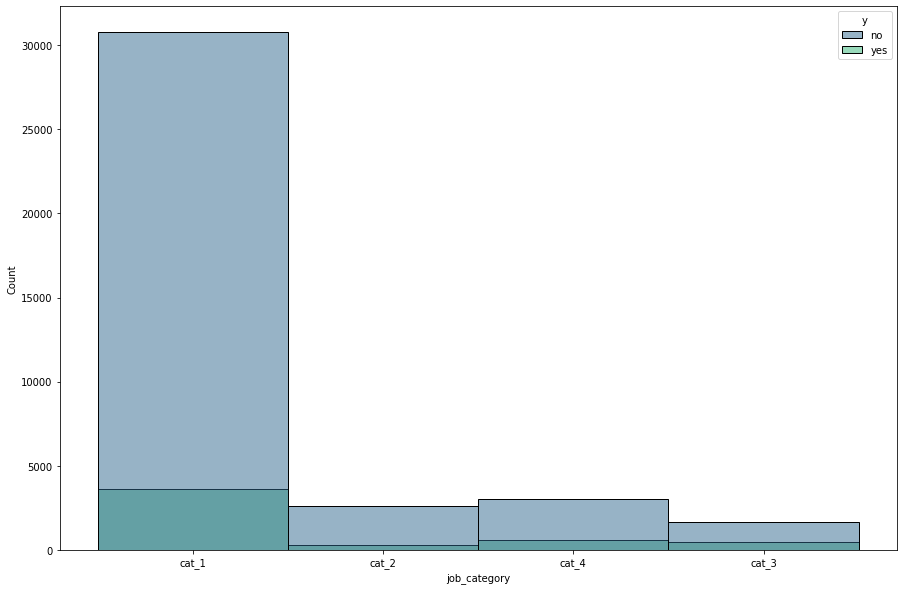

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'job_category',
              data = banking_df,
              palette="viridis",hue='y')
plt.show()

It clearly shows us that the clients with category 1 jobs have subscribed the term deposit highest and category 2 is the lowest

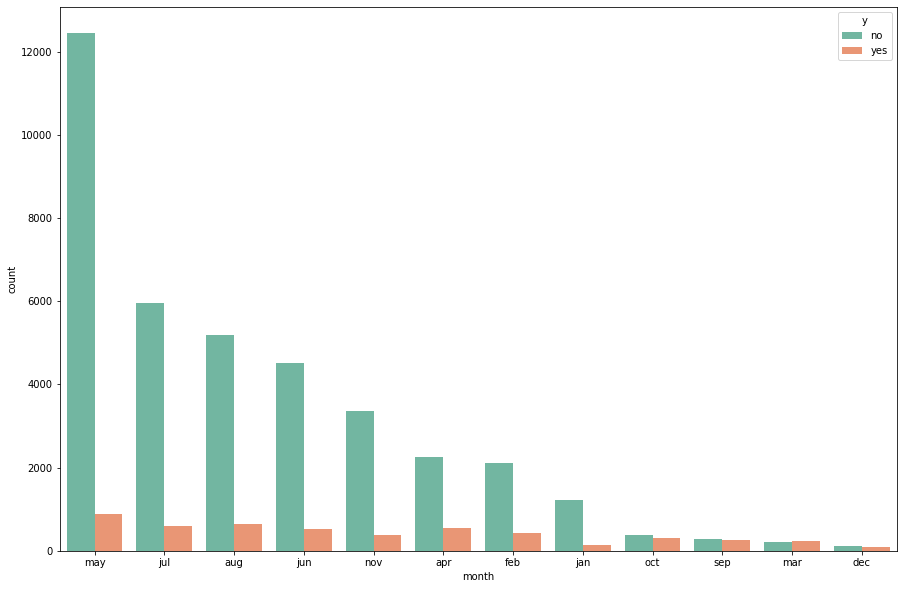

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'month',
              data = banking_df,order=banking_df['month'].value_counts().index,
              palette="Set2",hue='y')
plt.show()

It shows that in april to august are the months where clients subscribe term deposit and during october to march clients don't often subscribe 

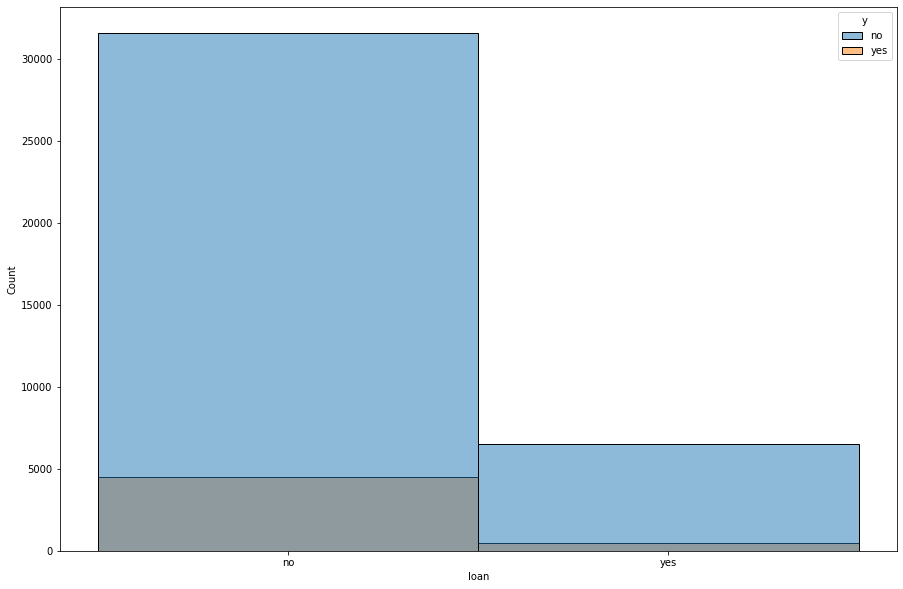

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'loan',
              data = banking_df,
              palette="tab10",hue='y')
plt.show()

This plot shows that clients who have no loans mostly take term deposit.

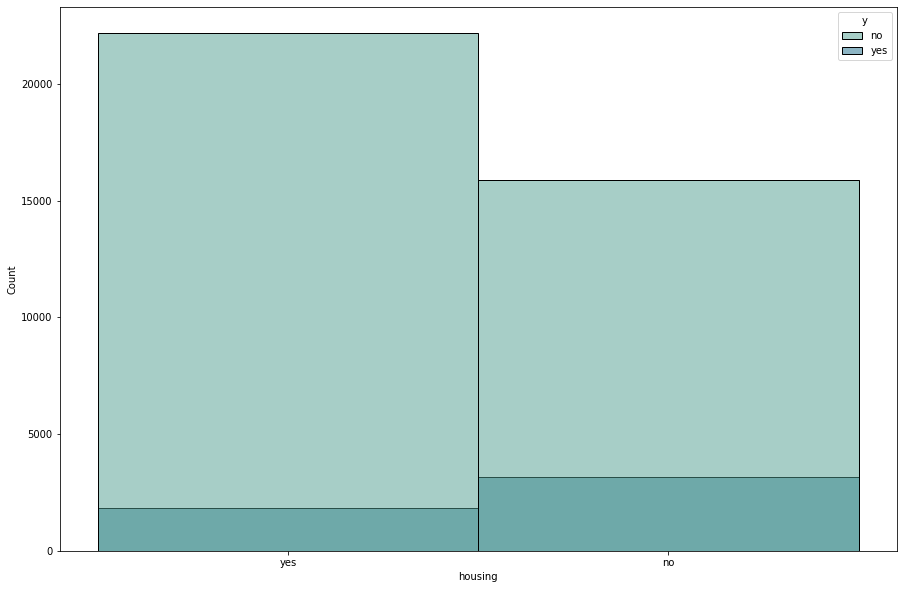

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'housing',
              data = banking_df,
              palette="crest",hue='y')
plt.show()

Clients who have no housing loans take the term deposit the most

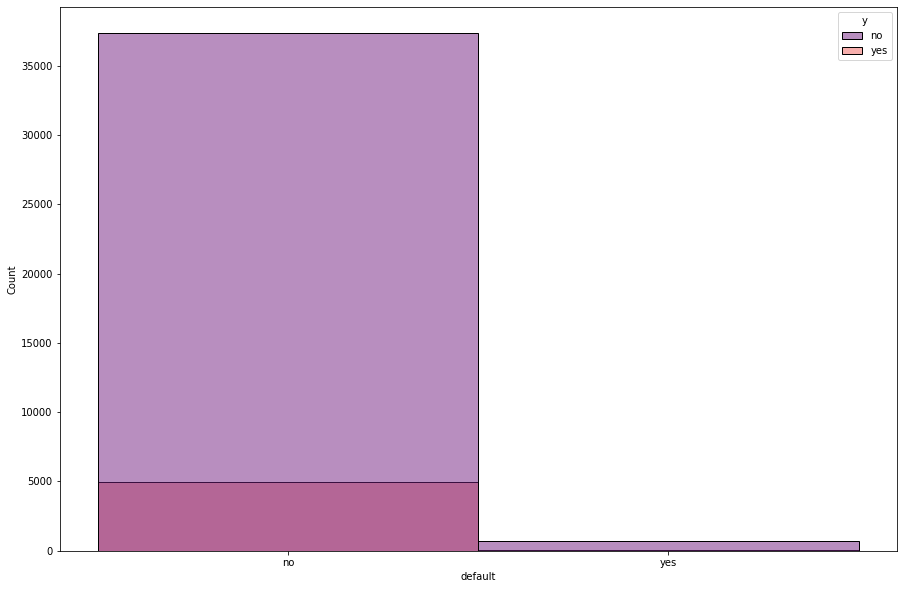

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x = 'default',
              data = banking_df,
              palette="magma",hue='y')
plt.show()

The clients who have no default in credit have subsribed the term deposit most and who have default in credit have never took term deposit.

In [ ]:
def age_category(age):
  if age < 25:
    return 'Fresher'
  elif age < 50:
    return 'Stable'
  elif age < 59 :
    return 'Retirement stage'
  elif age < 75:
    return 'old age'
  else: 
    return 'Counting last days'
 

In [ ]:
banking_df['age_category'] = banking_df['age'].apply(age_category)

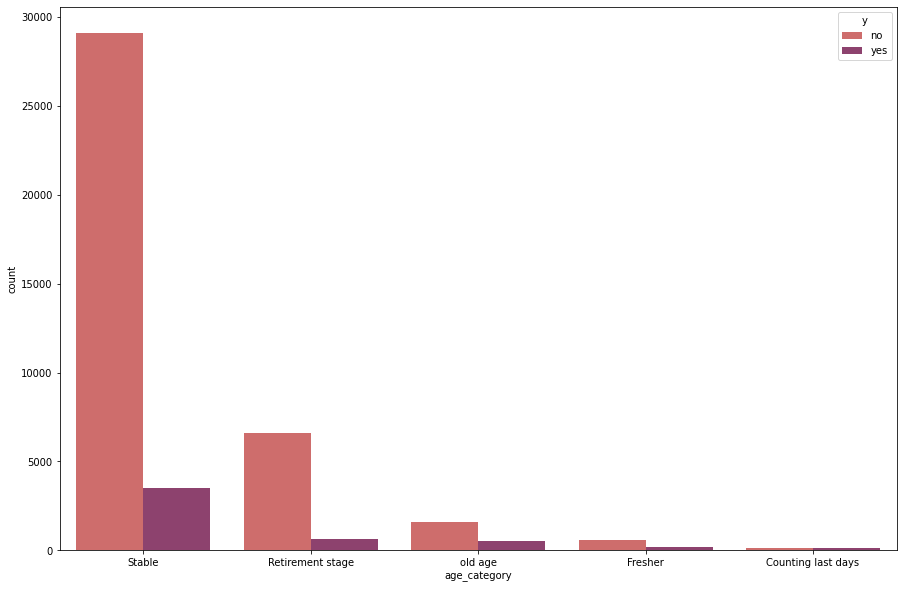

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'age_category',
              data = banking_df,order=banking_df['age_category'].value_counts().index,
              hue='y',palette="flare")
plt.show()

We can clearly depict that the clients with stable age are the ones who took term deposit the most and those who are counting last days are the least to take term deposit

In [ ]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_category,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,cat_1,Retirement stage
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,cat_1,Stable
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,cat_2,Stable
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,cat_1,Stable
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,cat_4,Stable


In [ ]:
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
#Performing Numerical column analysis

def draw_scatterplot(x_values, y_values):
    plt.figure(figsize=(15,12))
    sns.scatterplot(x_values, y_values,s=40)
    plt.title("Scatter Plot")
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


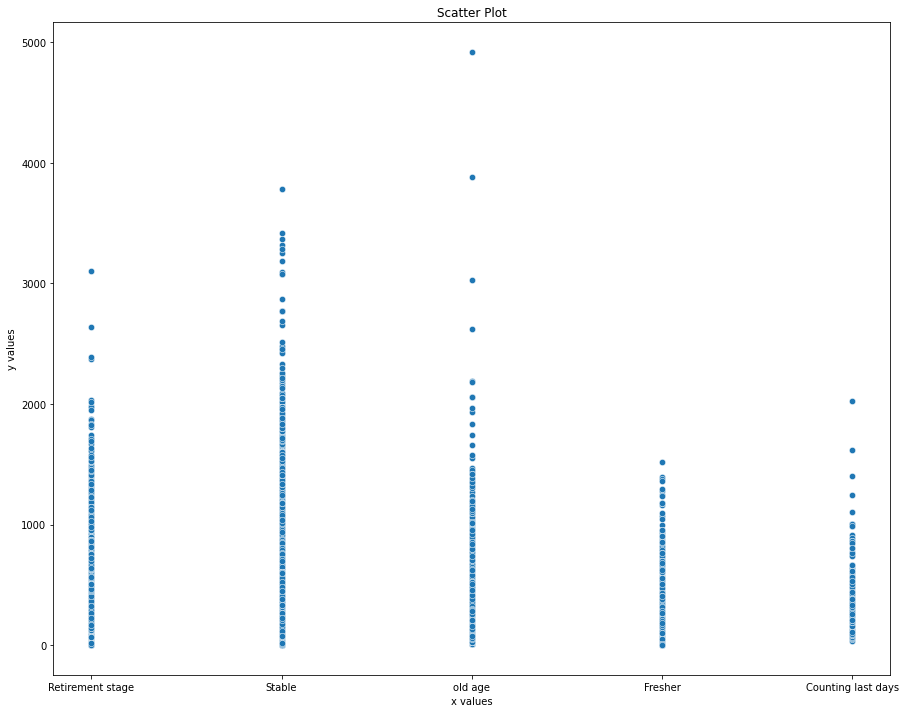

In [ ]:
draw_scatterplot(banking_df['age_category'],banking_df['duration'])

In [ ]:
banking_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_category,age_category
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,cat_1,Stable
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,cat_1,Retirement stage
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,cat_3,old age
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,cat_3,old age
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,cat_1,Retirement stage


In [ ]:
# no one hot encoding for month column instead assigning values for each month randomly

banking_df_month = banking_df['month'].value_counts().to_dict()

In [ ]:
banking_df_month

{'may': 13340,
 'jul': 6558,
 'aug': 5828,
 'jun': 5030,
 'nov': 3732,
 'apr': 2817,
 'feb': 2534,
 'jan': 1357,
 'oct': 683,
 'sep': 539,
 'mar': 454,
 'dec': 195}

In [ ]:
banking_df.month = banking_df.month.map(banking_df_month)

In [ ]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_category,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,13340,261,1,-1,0,unknown,no,cat_1,Retirement stage
1,44,technician,single,secondary,no,29,yes,no,unknown,5,13340,151,1,-1,0,unknown,no,cat_1,Stable
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,13340,76,1,-1,0,unknown,no,cat_2,Stable
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,13340,92,1,-1,0,unknown,no,cat_1,Stable
4,33,unknown,single,unknown,no,1,no,no,unknown,5,13340,198,1,-1,0,unknown,no,cat_4,Stable


In [ ]:
banking_df['previous'].value_counts()

0    35533
1     2724
2     2070
3     1120
4      696
5      451
6      273
7      200
Name: previous, dtype: int64

In [ ]:
#droppping colums because we have extracted new features from that columns
banking_df.drop(columns=['age','pdays','duration','job'],axis=1,inplace=True)

In [ ]:
banking_df.head()

,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,job_category,age_category
0,married,tertiary,no,2143,yes,no,unknown,5,13340,1,0,unknown,no,cat_1,Retirement stage
1,single,secondary,no,29,yes,no,unknown,5,13340,1,0,unknown,no,cat_1,Stable
2,married,secondary,no,2,yes,yes,unknown,5,13340,1,0,unknown,no,cat_2,Stable
3,married,unknown,no,1506,yes,no,unknown,5,13340,1,0,unknown,no,cat_1,Stable
4,single,unknown,no,1,no,no,unknown,5,13340,1,0,unknown,no,cat_4,Stable


In [ ]:
# Converting minimum categorical values into numerical values for model implementation

banking_df['default'] = banking_df["default"].apply(lambda x : 1 if x=='yes' else 0)

banking_df['y'] = banking_df["y"].apply(lambda x : 1 if x=='yes' else 0)

banking_df['housing'] = banking_df["housing"].apply(lambda x : 1 if x=='yes' else 0)

banking_df['loan'] = banking_df["loan"].apply(lambda x : 1 if x=='yes' else 0)

In [ ]:
banking_df.head()

,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,job_category,age_category
0,married,tertiary,0,2143,1,0,unknown,5,13340,1,0,unknown,0,cat_1,Retirement stage
1,single,secondary,0,29,1,0,unknown,5,13340,1,0,unknown,0,cat_1,Stable
2,married,secondary,0,2,1,1,unknown,5,13340,1,0,unknown,0,cat_2,Stable
3,married,unknown,0,1506,1,0,unknown,5,13340,1,0,unknown,0,cat_1,Stable
4,single,unknown,0,1,0,0,unknown,5,13340,1,0,unknown,0,cat_4,Stable


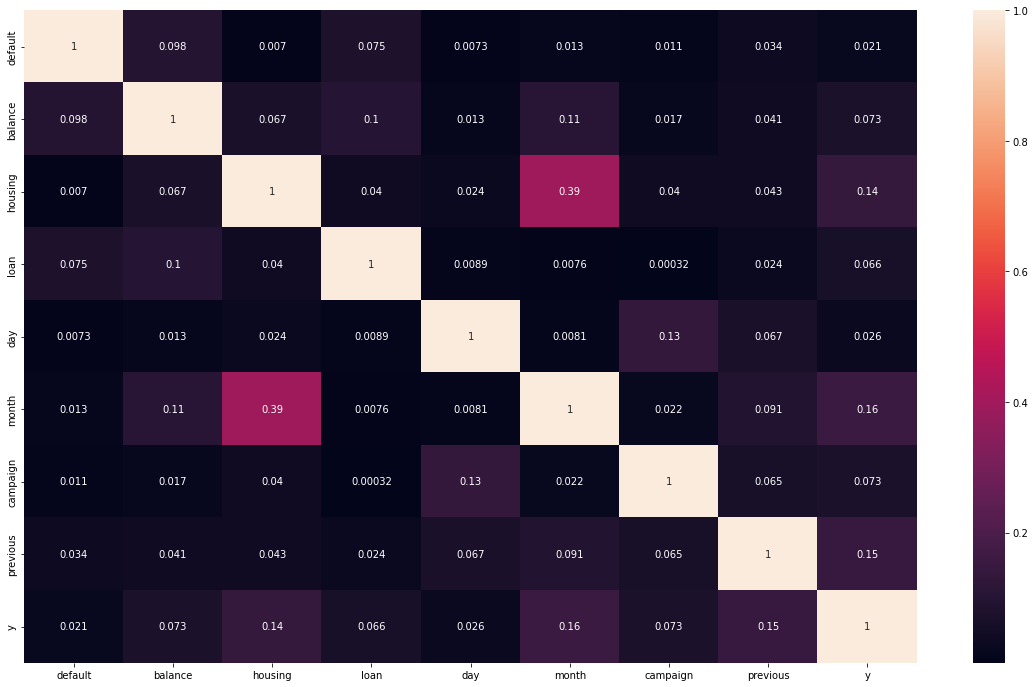

In [ ]:
# Plotting correlation matrix
plt.subplots(figsize=(20,12))
sns.heatmap(banking_df.corr().abs(), annot=True)

# Preparing data to fit machine learning model

In [ ]:
#Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
marital = pd.get_dummies(banking_df['marital'],prefix='marital')
contact = pd.get_dummies(banking_df['contact'], prefix='contact')
poutcome = pd.get_dummies(banking_df['poutcome'], prefix = 'poutcome')
age_category = pd.get_dummies(banking_df['age_category'],prefix = 'age_cat')
job_category = pd.get_dummies(banking_df['job_category'],prefix = 'new_job')
education = pd.get_dummies(banking_df['education'],prefix = 'educaton')

In [ ]:
# list1 = ['marital','contact','poutcome','age_category','job_category','education']

In [ ]:
# def dummy(col) :
#   if col == 'marital' :
#      marital = pd.get_dummies(banking_df['marital'],prefix='marital')
#      return marital
#   elif col == 'contact' :
#     contact = pd.get_dummies(banking_df['contact'], prefix='contact')
#     return contact
#   elif col == 'poutcome'  :
#     poutcome = pd.get_dummies(banking_df['poutcome'], prefix = 'poutcome')
#     return poutcome
#   elif col == 'age_category'  :
#     age_category = pd.get_dummies(banking_df['age_category'],prefix = 'age_cat')
#     return age_category
#   elif col == 'job_category' :
#     new_jobs = pd.get_dummies(banking_df['job_category'],prefix = 'new_job')
#     return job_category
#   else :
#     education = pd.get_dummies(banking_df['education'],prefix = 'educaton')
#     return education


  

In [ ]:
# for col in list1 :
#  dummy(col)
#  banking_df = pd.concat([banking_df,col],axis=1)

In [ ]:
banking_df = pd.concat([banking_df,marital,contact,poutcome,age_category,job_category,education],axis=1)

In [ ]:
#dropping duplicate features
banking_df.drop(['marital','contact','poutcome','age_category','job_category','education'],axis=1,inplace=True)

In [ ]:
banking_df.columns.value_counts().sum()

32

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:

#cheaking multicolliniarity for each feature
calc_vif(banking_df[[i for i in banking_df.describe().columns if i not in ['y',]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,default,1.016836
1,balance,1.045136
2,housing,1.300518
3,loan,1.033118
4,day,1.026508
5,month,1.422442
6,campaign,1.044609
7,previous,2.975513
8,marital_divorced,inf
9,marital_married,inf


# Splitting Dependent and Independent Variables

In [ ]:
y = banking_df['y']
x = banking_df.drop(columns='y',axis = 1)

In [ ]:
x.columns

Index(['default', 'balance', 'housing', 'loan', 'day', 'month', 'campaign',
       'previous', 'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_cat_Counting last days', 'age_cat_Fresher',
       'age_cat_Retirement stage', 'age_cat_Stable', 'age_cat_old age',
       'new_job_cat_1', 'new_job_cat_2', 'new_job_cat_3', 'new_job_cat_4',
       'educaton_primary', 'educaton_secondary', 'educaton_tertiary',
       'educaton_unknown'],
      dtype='object')

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: y, Length: 43067, dtype: int64

# SMOTE Oversampling for handling class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(x,y)

In [ ]:

#Original length and Resampled Length
print('Original Dataset length',len(x))
print('Resamped Dataset length',len(X))

Original Dataset length 43067
Resamped Dataset length 76132


# Train and Test Split

In [ ]:
#loading required libraries and performing train test split by 75-25 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y)
print('train features shape:',X_train.shape)
print('test features shape:',X_test.shape)
print('train label shape:',y_train.shape)
print('test label shape:',y_test.shape)

train features shape: (57099, 31)
test features shape: (19033, 31)
train label shape: (57099,)
test label shape: (19033,)


In [ ]:
#Lets define a function for Evaluation metrics so that we can reuse it again and again
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)

**MODEL IMPLEMENTATION**

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred_naive = gnb.predict(X_test)
print(y_pred_naive)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_naive)*100)

[0 0 1 ... 0 0 1]
Gaussian Naive Bayes model accuracy(in %): 82.08374927757053


[[7254 2263]
 [1147 8369]]


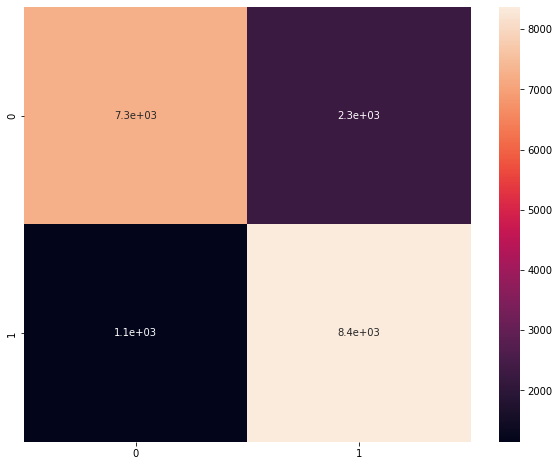

In [ ]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test, y_pred_naive)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print_metrics(y_test,y_pred_naive,'Naive_Bayes')

Naive_Bayes Test accuracy Score 0.8208374927757054
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      9517
           1       0.79      0.88      0.83      9516

    accuracy                           0.82     19033
   macro avg       0.83      0.82      0.82     19033
weighted avg       0.83      0.82      0.82     19033



array([[7254, 2263],
       [1147, 8369]])

# Gaussian Naive Bayes model accuracy(in %): 81.75943089023596

# Applying K_nearest Neighbour Machine learing Algorithm 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)

print_metrics(y_test,y_pred_knn,'KNN')
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_knn)*100)

KNN Test accuracy Score 0.7855829349025377
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      9517
           1       0.75      0.87      0.80      9516

    accuracy                           0.79     19033
   macro avg       0.79      0.79      0.78     19033
weighted avg       0.79      0.79      0.78     19033

KNN model accuracy(in %): 78.55829349025377


# KNN model accuracy(in %): 78.80867691999399

# SVM Implementation

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)


print_metrics(y_test,y_pred_svc,'SVC')
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_svc)*100)

SVC Test accuracy Score 0.6169810329427836
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      9517
           1       0.62      0.59      0.61      9516

    accuracy                           0.62     19033
   macro avg       0.62      0.62      0.62     19033
weighted avg       0.62      0.62      0.62     19033

SVM model accuracy(in %): 61.69810329427836


# Applying XG boost classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 8, n_estimators = 200)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print_metrics(y_test,y_pred_xgb,'xgb')

xgb Test accuracy Score 0.9318026585404298
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      9517
           1       0.97      0.89      0.93      9516

    accuracy                           0.93     19033
   macro avg       0.93      0.93      0.93     19033
weighted avg       0.93      0.93      0.93     19033



array([[9262,  255],
       [1043, 8473]])

# xgb Test accuracy Score 0.9318026585404298

In [268]:
parameters=[{'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30], 'max_depth': range(3,15),'min_child_weight' : [1,3,5,7],'gamma':[0.0,0.1,0.2,0.3,0.4],'colsample_bytree' : [0.3,0.4,0.5,0.7]}] 

In [269]:
from sklearn.model_selection import RandomizedSearchCV
classifier=XGBClassifier()
xgb_hypertuned=RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=1)
xgb_hypertuned.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions=[{'colsample_bytree': [0.3, 0.4, 0.5,
                                                              0.7],
                                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                         'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                           0.25, 0.3],
                                         'max_depth': range(3, 15),
                                         'min_child_weight': [1, 3, 5, 7]}],
                   random_state=1, scoring='roc_auc', verbose=3)

In [270]:
xgb_hypertuned.best_params_

{'min_child_weight': 7,
 'max_depth': 13,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [271]:
xgb_hypertuned.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=13,
              min_child_weight=7)

In [272]:
#loading libraries
from xgboost import XGBClassifier
xgb_hyp=XGBClassifier(colsample_bytree=0.3, gamma=0.4,learning_rate=0.25,max_depth=13,min_child_weight=7)

In [273]:
from sklearn.model_selection import cross_val_score
xgb_hyp.fit(X_train,y_train)
score=cross_val_score(xgb_hyp,X_train,y_train,cv=10)
y_pred_xgb_hypertuned = xgb_hyp.predict(X_test)
print('Cross_validation score',score)
print_metrics(y_test,y_pred_xgb_hypertuned,'xgb_hypertuned')

Cross_validation score [0.93432574 0.93380035 0.93257443 0.92924694 0.93327496 0.93274956
 0.93204904 0.92854641 0.93029772 0.92923454]
xgb_hypertuned Test accuracy Score 0.9338517312036988
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9517
           1       0.97      0.90      0.93      9516

    accuracy                           0.93     19033
   macro avg       0.94      0.93      0.93     19033
weighted avg       0.94      0.93      0.93     19033



array([[9214,  303],
       [ 956, 8560]])

[[9214  303]
 [ 956 8560]]


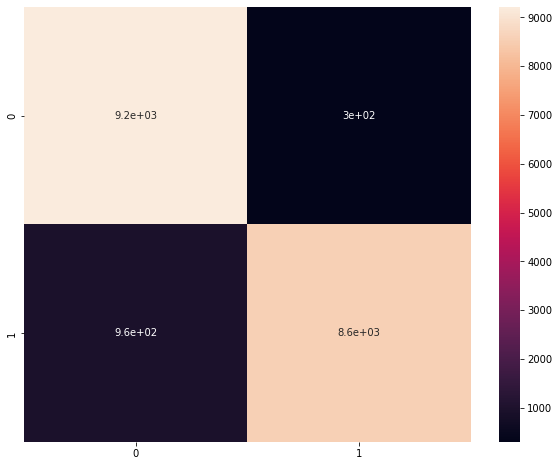

In [274]:
#Get the confusion matrix
plt.figure(figsize=(10,8))
cf_matrix = confusion_matrix(y_test,y_pred_xgb_hypertuned)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)